<a href="https://colab.research.google.com/github/temple17/self-review/blob/main/California_housing_price_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step1.Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as px

import os
import tarfile
import urllib.request


import geopandas as gpd
#!pip install geoplot
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc

# Step2. Data Preparation 
## Download the dataset

In [2]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path = housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
def load_housing_data(housing_path = HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()


# Step3.EDA


## 3-1. Univariate Analysis (Histogram)

In [7]:
housing.info()
# 207 null values in total_bedrooms

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3f7409710>,
      dtype=object)

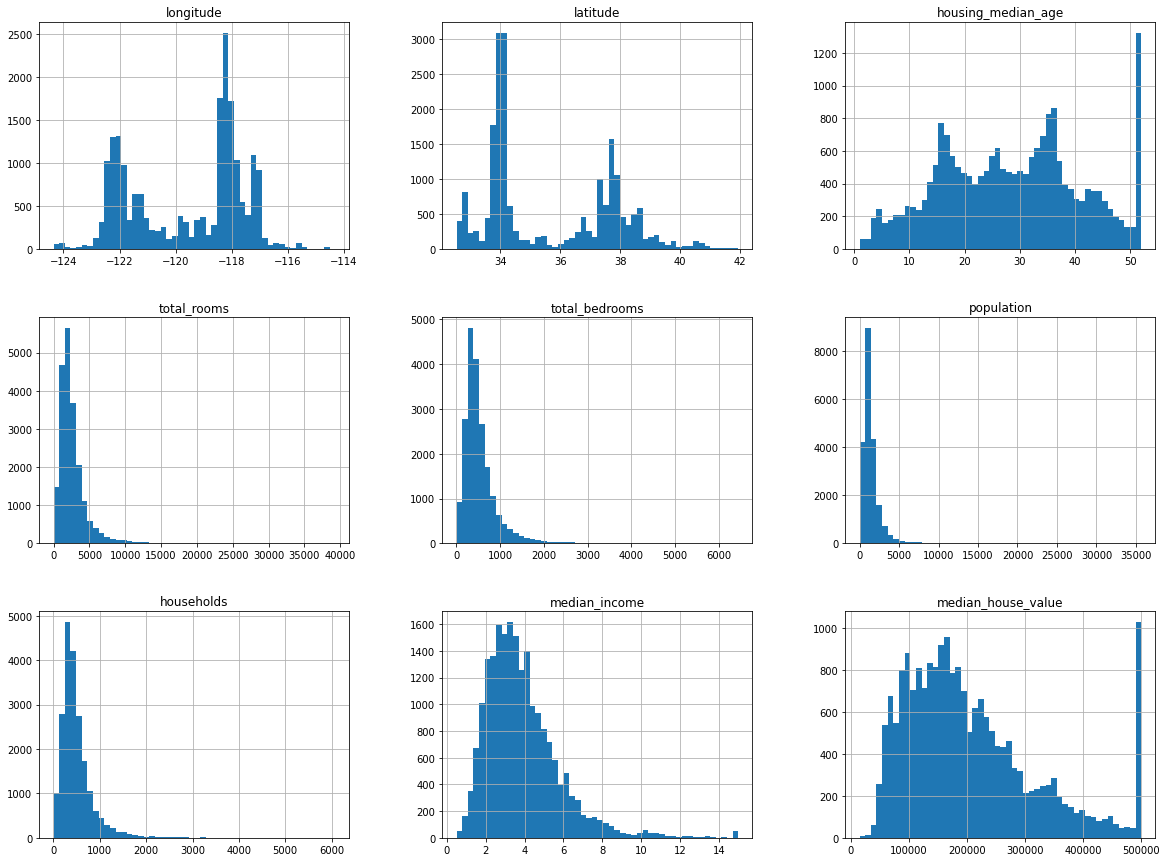

In [9]:
housing.hist(bins = 50, figsize = (20, 15))

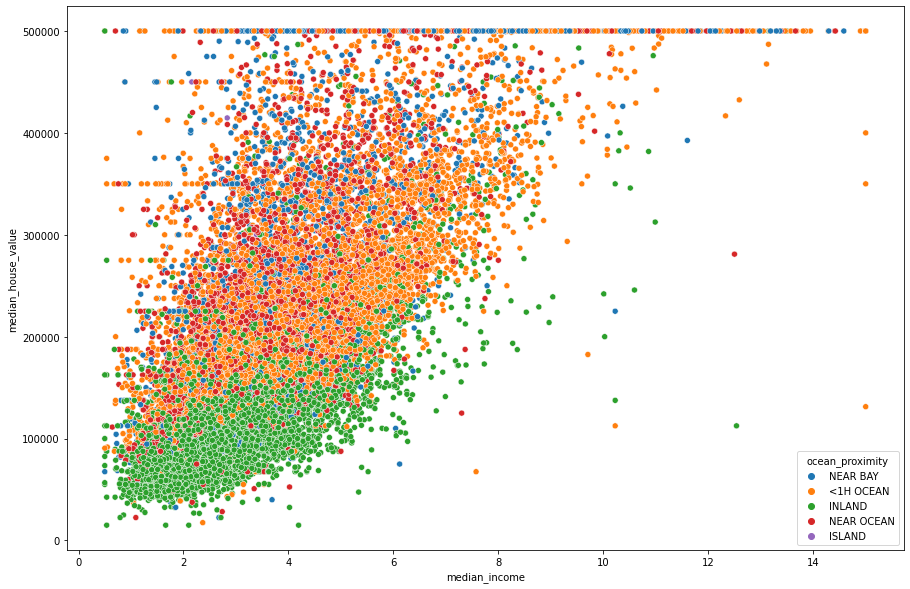

In [10]:
plt.figure(figsize = (15,10))
sns.scatterplot(data = housing, x = 'median_income', y = 'median_house_value', hue = 'ocean_proximity')

In [11]:
housing['value_range'] = pd.cut(housing['median_house_value'], 5, labels = ['1','2','3','4','5'])

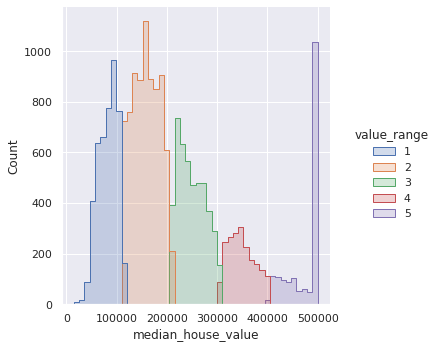

In [12]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.displot(housing, x = 'median_house_value', hue = 'value_range', element = 'step')

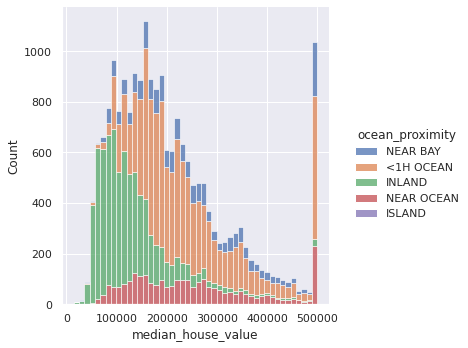

In [13]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.displot(housing, x = 'median_house_value', hue = 'ocean_proximity', multiple = 'stack')

In [14]:
housing.groupby(['ocean_proximity']).size()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
dtype: int64

## 3.2 Bivariate Analysis

## 3.3 Null values imputation

In [15]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
value_range             0
dtype: int64

In [16]:
housing[housing['total_bedrooms'].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,value_range
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY,2
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY,1
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY,2
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY,3
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY,2
...,...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN,3
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN,2
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN,5
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN,3


### 3.3.1 kNN Unsupervised Learning Imputation

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe
def impute_knn(df):
    # seperate dataframe into numerical/categorical
    ldf = housing.select_dtypes(include=[np.number]) # select numerical columns in housing
    ldf_putaside = housing.select_dtypes(exclude = [np.number]) # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()
    cols_no_nan = ldf.columns.difference(cols_nan).values

    for col in cols_nan:
        imp_test = ldf[ldf[col].isna()]
        imp_train = ldf.dropna()
        model = KNeighborsRegressor(n_neighbors=5)
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[housing[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    return pd.concat([ldf, ldf_putaside], axis = 1)

In [18]:
housing = impute_knn(housing)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [19]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20640 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  value_range         20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


## 3.4 Detect Outliers
- **Odd Patterns & Outliers**   
히스토그램에 따르면 median_house_age와 median_house_value에 outlier가 존재할 가능성이 있다.
- **Less Noticeable Outliers**   
6개의 feature가 skewed된 pattern을 보이고 있지만, 조금은 신경쓰면서 진행하면 될 듯하다.     
몇몇의 feature의 x축이 지나치게 광범위해서 transformation이 필요해보인다.   
total_bedrooms와 population, 그리고 total_rooms가 거의 동일한 분포를 보인다.


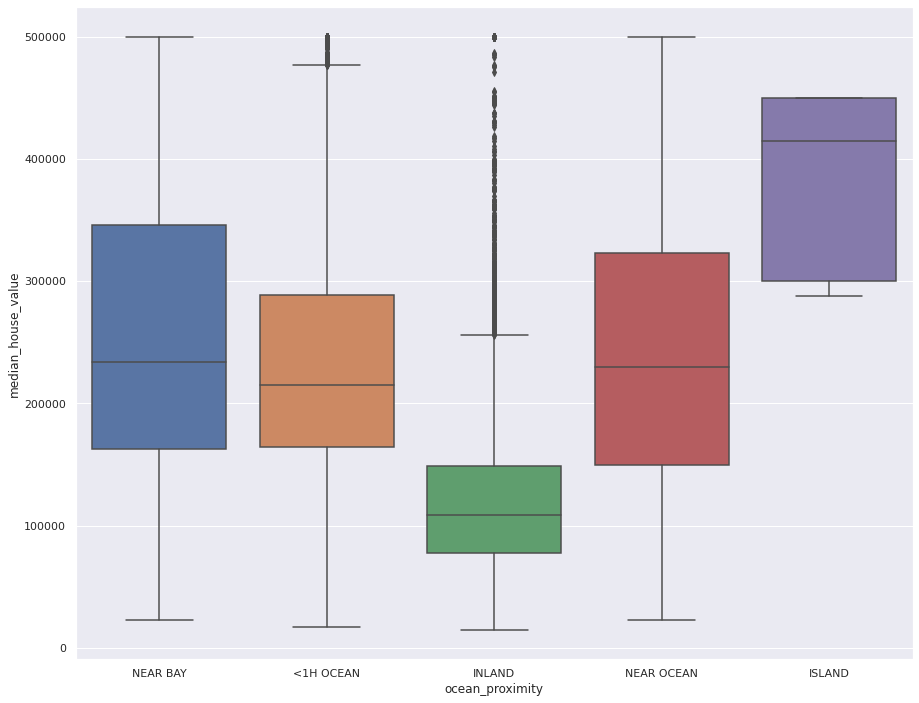

In [20]:
plt.figure(figsize = (15,12))
sns.boxplot(data = housing, x = 'ocean_proximity', y = 'median_house_value')

## 3.5 Bivariate Correlation Matrix

In [21]:
def corrMat(dataset, id = False):
    corr_mat = housing.corr().round(2)
    f, ax = plt.subplots(figsize=(6,6))
    mask = np.zeros_like(corr_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr_mat, mask = mask, vmin = -1, vmax= 1, center=0,
                cmap = 'RdPu_r', square = False, lw=2, annot = True, cbar = True);plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


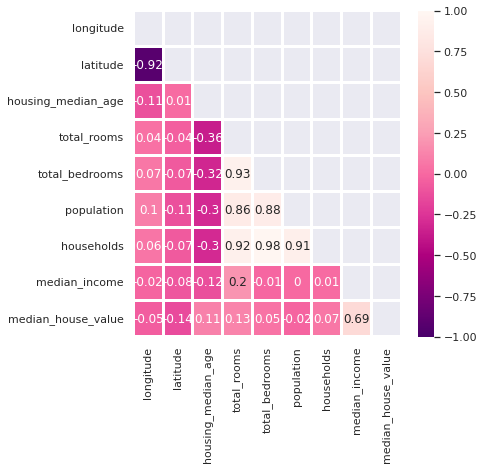

In [22]:
corrMat(housing)

## 3.6 Bivariate Scattered Data
- Irregular pattern or outliers
- two dimensional data clusters
- two feature correlation value visualization

In [23]:
def snsPairGrid(dataset):
    g = sns.PairGrid(dataset, diag_sharey = False)
    g.map_lower(sns.scatterplot, s = 13, edgecolor = 'k', alpha= 0.4)
    g.map_lower(sns.kdeplot, cmap = 'plasma', n_levels=10)
    g.map_diag(sns.kdeplot, lw = 2)
    plt.tight_layout()

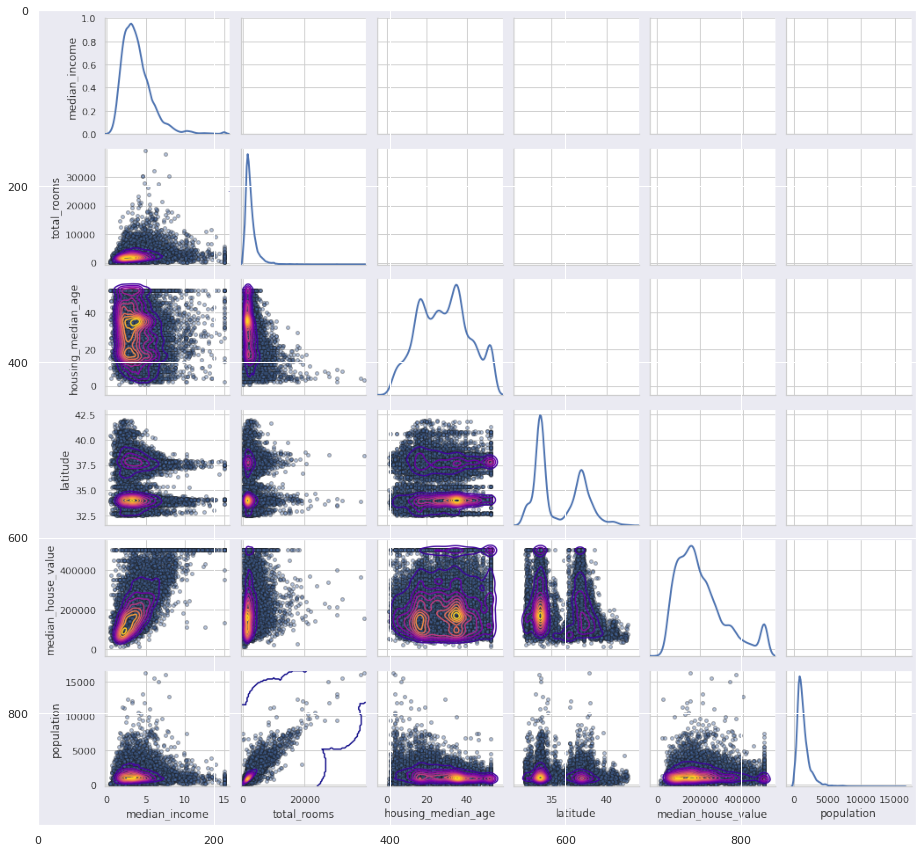

In [24]:
# Too large
# hlist = ['median_income','total_rooms', 'housing_median_age', 'latitude','median_house_value', 'population']
# snsPairGrid(housing[hlist])
import matplotlib.image as mpimg
img = mpimg.imread('/content/drive/MyDrive/EDA/pairplot.png')
plt.imshow(img)

# img_source : 'https://www.kaggle.com/code/shtrausslearning/bayesian-regression-house-price-prediction#3-|-EXPLORATORY-DATA-ANALYSIS'

**결과**
- median_income & median_house_value : quite linear
- median_house_value & median_house_age : 2 peaks roughtly apart 20 years
- median_house_value & total_rooms,population : a bit larger values & a lot of data outside the main clusters, classifiable as **outliers**
- scailing should be considered

## 3.7 Geospatial Multivariate data

In [25]:
# def plotTwo(df, feature):
#     cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
#     cali.assign(area = cali.geometry.area)
    
#     gdf = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.longitude, df.latitude))
#     proj = gcrs.AlbersEqualArea(central_latitude = 37.16611, central_longitude=-119.44944)
#     ii = -1
#     fig, ax = plt.subplots(2, 2, figsize=(21,6), subplot_kw={'projection': proj})
#     ax = ax.flatten()

#     for i in feature:
#         ii+=1
#         tgdf = gdf.sort_values(by=i, ascending=True)
#         gplt.polyplot(cali, projection=proj, ax = ax[ii])
#         gplt.pointplot(tgdf,ax=ax[i], hue=i, cmap = 'plasma', legend=True, alpha=1.0, s=3)
#         ax[ii].set_title(i)
    
#     plt.tight_layout()
#     plt.subplots_adjust(wspace=-0.5)


In [26]:
plotTwo(housing, ['population', 'median_income'])
plotTwo(housing, ['housing_median_age', 'median_house_value'])

In [29]:
cali = gpd.read_file(gplt.datasets.get_path('california_congressional_districts'))
cali.crs.to_epsg()

4326

In [30]:
cali.head()

,Name,description,descriptio,geometry
0,01,None,,"MULTIPOLYGON (((-120.07192 41.99495, -120.0010..."
1,02,None,,"MULTIPOLYGON (((-123.69821 41.81719, -123.6967..."
2,03,None,,"MULTIPOLYGON (((-121.66700 39.30511, -121.6301..."
3,04,None,,"MULTIPOLYGON (((-120.37731 37.61679, -120.3823..."
4,05,None,,"MULTIPOLYGON (((-122.16384 38.64288, -122.1659..."
